In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# for better interactive visualization
import plotly.graph_objects as go
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
import os 

In [5]:
files = os.listdir(r'C:\Users\Anshal\Desktop\EDA Project\Covid Dataset\Covid-19')

In [6]:
files

['country_wise_latest.csv',
 'covid_19_clean_complete.csv',
 'day_wise.csv',
 'full_grouped.csv',
 'usa_country_wise.csv',
 'worldometer_data.csv']

In [8]:
### lets create a function to make our task simpler as we have to read data aggain & again
def read_data(path, filename):
    return pd.read_csv(path+'/'+filename)

In [23]:
path = r'C:\Users\Anshal\Desktop\EDA Project\Covid Dataset\Covid-19'
world_data = read_data(path, 'worldometer_data.csv')

In [14]:
day_wise=read_data(path,files[2])

In [16]:
group_data=read_data(path,files[3])

In [17]:
use_data = read_data(path,files[4])

In [18]:
province_data = read_data(path,files[1])

# Which Country has maximum Total cases, Deaths, Recovered & Active cases

**lets create TreeMap Representation of our data**

In [24]:
world_data.columns

Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region'],
      dtype='object')

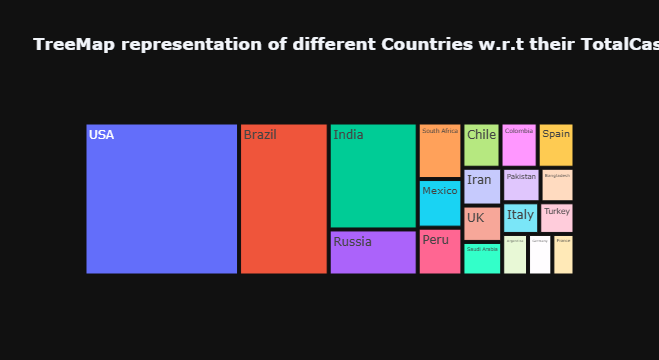

In [26]:
columns = ['TotalCases', 'TotalDeaths', 'TotalRecovered', 'ActiveCases']
for i in columns:
    fig = px.treemap(world_data[0:20],values=i, path=['Country/Region'], template = "plotly_dark", title="<b>TreeMap representation of different Countries w.r.t their {}</b>".format(i))
    fig.show()

# What is the trend of Confirmed Deaths Recovered Active Cases 

**Line Plot**

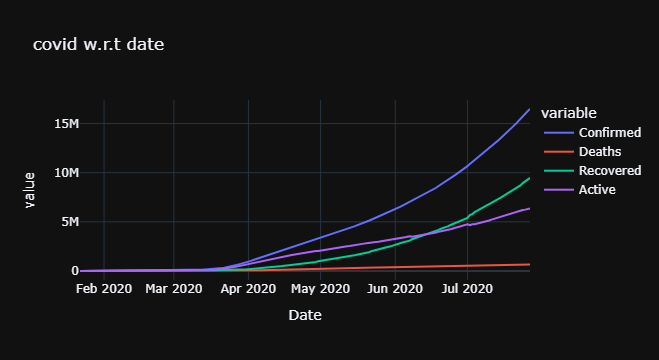

In [27]:
fig=px.line(day_wise, x="Date", y=["Confirmed", "Deaths", "Recovered", "Active"], title = "covid w.r.t date", template = "plotly_dark")
fig.show()

# Find 20 most effected countries

**BarPlot Representation of Population to Tests Done Ration**

In [29]:
pop_test_ratio = world_data.iloc[0:20]['Population']/world_data.iloc[0:20]['TotalTests']

In [30]:
pop_test_ratio

0       5.245489
1      16.106896
2      62.365033
3       4.911040
4      18.852446
5     122.115932
6      13.241331
7      10.866949
8      28.269105
9       6.618696
10     32.187237
11      3.877883
12      9.589865
13    107.484026
14    134.558952
15      8.514790
16     16.613857
17     56.934398
18      9.760649
19     16.353942
dtype: float64

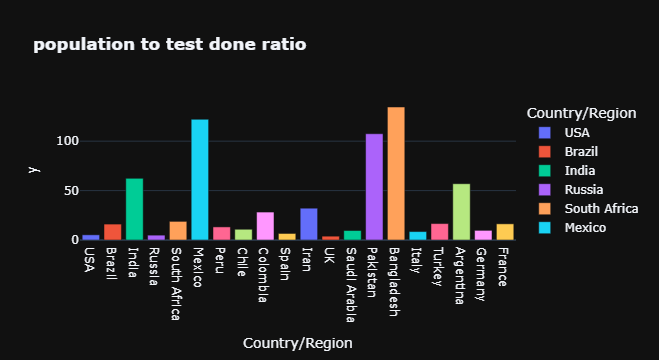

In [34]:
fig=px.bar(world_data.iloc[0:20], color='Country/Region', y=pop_test_ratio, x='Country/Region', template="plotly_dark", title="<b>population to test done ratio</b>")
fig.show()

# 20 Countries that are badly affected by Corona

**BarPlot Representation of CoronaViruses Cases w.r.t Time**

In [40]:
fig=px.bar(world_data.iloc[0:20], x='Country/Region', y=['Serious,Critical', 'TotalRecovered', 'ActiveCases', 'TotalCases'], template="plotly_dark")


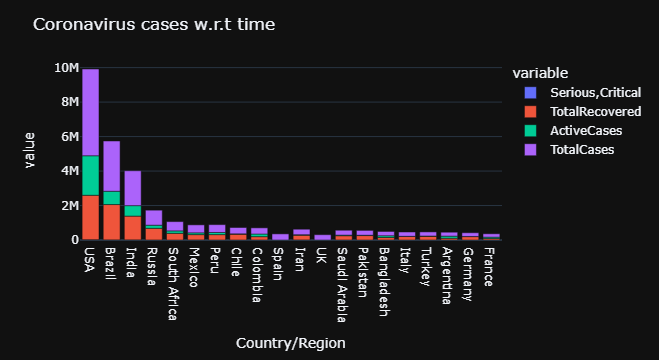

In [41]:
fig.update_layout({'title':"Coronavirus cases w.r.t time"})
fig.show()

# Top 20 Countries of Total Confirmed Cases, Total Recovered Cases, Total Deaths, Total Active Cases

In [42]:
world_data.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [43]:
world_data['Country/Region'].nunique()

209

# Top 20 countries of Total Deaths  

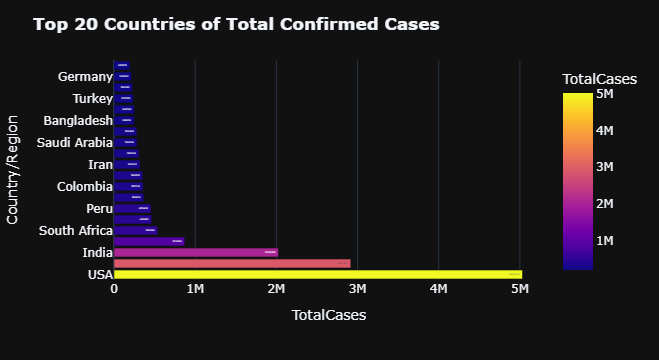

In [45]:
fig = px.bar(world_data.iloc[0:20], y='Country/Region', x='TotalCases', color = 'TotalCases', text='TotalCases')
fig.update_layout(template="plotly_dark", title_text="<b>Top 20 Countries of Total Confirmed Cases<b>")
fig.show()

# Top 20 countries of Total Active Cases 

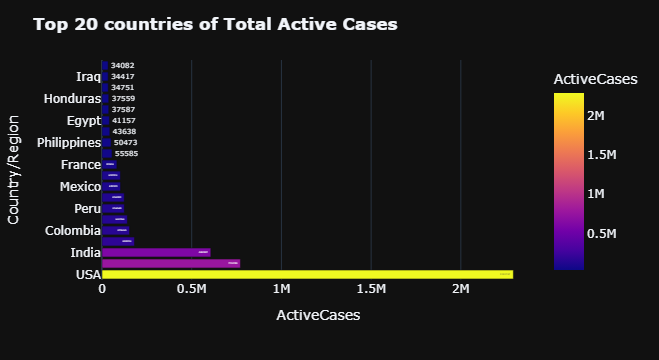

In [47]:
fig = px.bar(world_data.sort_values(by='ActiveCases', ascending=False)[0:20], y='Country/Region', x='ActiveCases', color = 'ActiveCases', text='ActiveCases')
fig.update_layout(template="plotly_dark", title_text = "<b>Top 20 countries of Total Active Cases </b>")
fig.show()

# Top 20 Countries of Total Recoveries 

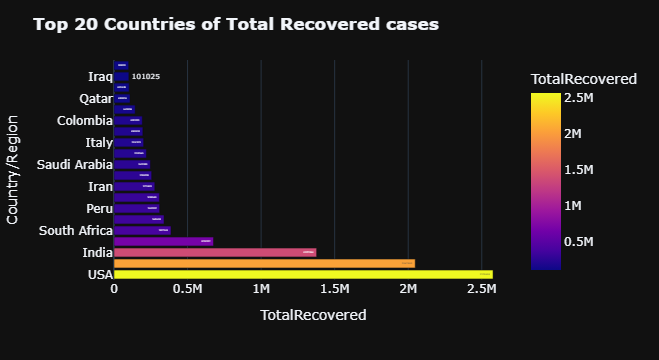

In [50]:
fig = px.bar(world_data.sort_values(by='TotalRecovered',ascending=False)[:20], y= 'Country/Region', x='TotalRecovered', color='TotalRecovered', text='TotalRecovered')
fig.update_layout(template="plotly_dark", title_text="<b>Top 20 Countries of Total Recovered cases</b>")
fig.show()

In [51]:
world_data.columns

Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region'],
      dtype='object')

In [52]:
world_data[0:15]['Country/Region'].values

array(['USA', 'Brazil', 'India', 'Russia', 'South Africa', 'Mexico',
       'Peru', 'Chile', 'Colombia', 'Spain', 'Iran', 'UK', 'Saudi Arabia',
       'Pakistan', 'Bangladesh'], dtype=object)

# Pie Chart Representation of stats of worst affected countries

**Pie Charts in Donut Shape**

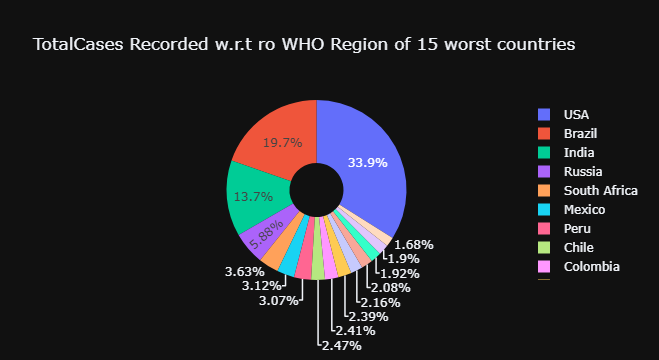

In [54]:
labels = world_data[0:15]['Country/Region'].values
cases = ['TotalCases', 'TotalDeaths', 'TotalRecovered', 'ActiveCases']
for i in cases:
    fig=px.pie(world_data[0:15],values=i, names = labels, template="plotly_dark",hole=0.3,title="{} Recorded w.r.t ro WHO Region of 15 worst countries".format(i))
    fig.show()

**Deaths to Confirmed Ratio**

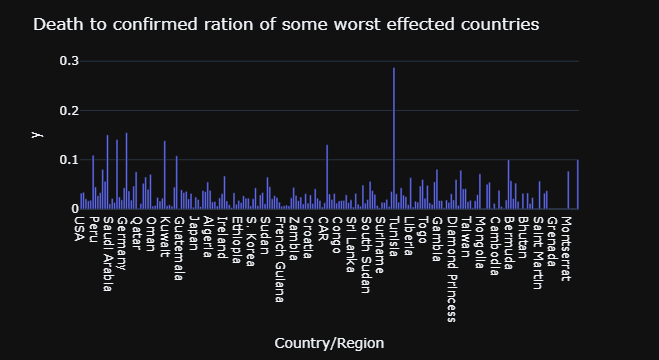

In [55]:
deaths_to_confirmed = (world_data['TotalDeaths']/world_data['TotalCases'])
fig = px.bar(world_data, x='Country/Region', y=deaths_to_confirmed)
fig.update_layout(title={'text':"Death to confirmed ration of some worst effected countries",'xanchor':'left'}, template="plotly_dark")
fig.show()

**Death to recovered ratio**

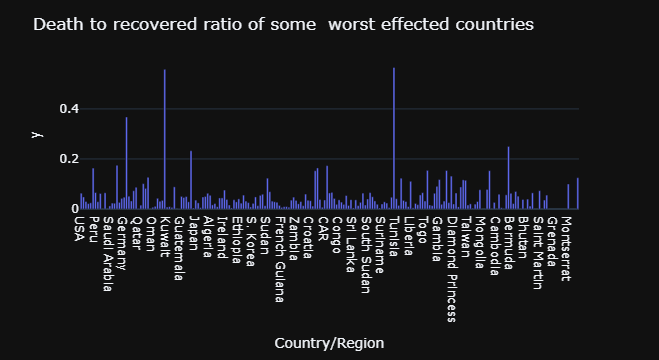

In [56]:
deaths_to_recovered=((world_data['TotalDeaths']/world_data['TotalRecovered']))
fig = px.bar(world_data,x='Country/Region',y=deaths_to_recovered)
fig.update_layout(title={'text':"Death to recovered ratio of some  worst effected countries",'xanchor':'left'},template="plotly_dark")
fig.show()


**Test to Confirmed Ratio**

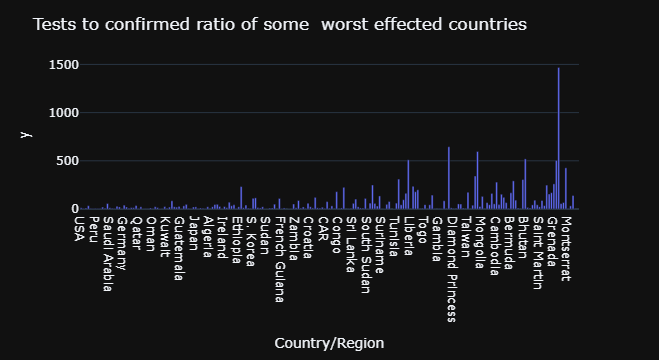

In [57]:
tests_to_confirmed=((world_data['TotalTests']/world_data['TotalCases']))
fig = px.bar(world_data,x='Country/Region',y=tests_to_confirmed)
fig.update_layout(title={'text':"Tests to confirmed ratio of some  worst effected countries",'xanchor':'left'},template="plotly_dark")
fig.show()

**Serious to Death Ratio**

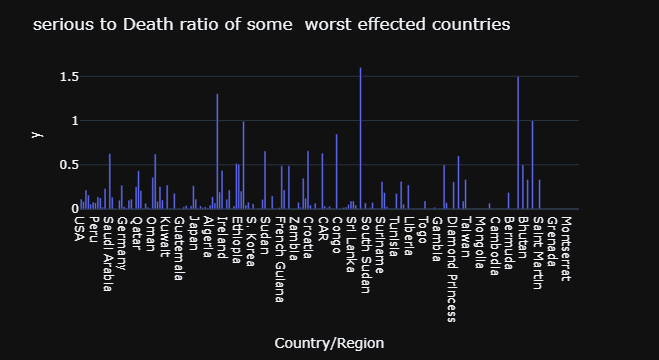

In [58]:
serious_to_death=((world_data['Serious,Critical']/world_data['TotalDeaths']))
fig = px.bar(world_data,x='Country/Region',y=serious_to_death)
fig.update_layout(title={'text':"serious to Death ratio of some  worst effected countries",'xanchor':'left'},template="plotly_dark")
fig.show()

# Visulaization Confirmed, Active, Recovered, Deaths Cases(entire Statistics) of a particular country

In [60]:
group_data.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


In [63]:
from plotly.subplots import make_subplots 
import plotly.graph_objects as go

In [64]:

def country_visualization(group_data,country):
    
    data=group_data[group_data['Country/Region']==country]
    df=data.loc[:,['Date','Confirmed','Deaths','Recovered','Active']]
    fig = make_subplots(rows=1, cols=4,subplot_titles=("Confirmed", "Active", "Recovered",'Deaths'))
    fig.add_trace(
        go.Scatter(name="Confirmed",x=df['Date'],y=df['Confirmed']),
        row=1, col=1
    )

    fig.add_trace(
        go.Scatter(name="Active",x=df['Date'],y=df['Active']),
        row=1, col=2
    )
    fig.add_trace(
        go.Scatter(name="Recovered",x=df['Date'],y=df['Recovered']),
        row=1, col=3
    )

    fig.add_trace(
        go.Scatter(name="Deaths",x=df['Date'],y=df['Deaths']),
        row=1, col=4
    )

    fig.update_layout(height=600, width=1000, title_text="Date Vs Recorded Cases of {}".format(country),template="plotly_dark")
    fig.show()  

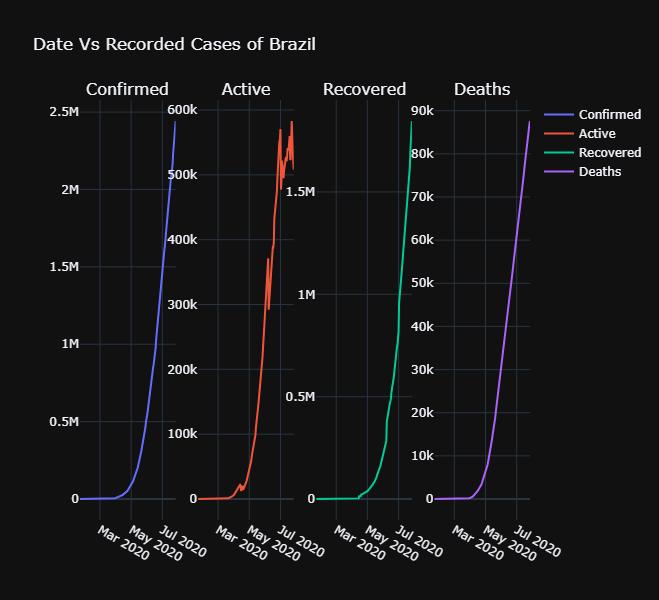

In [65]:
country_visualization(group_data,'Brazil')

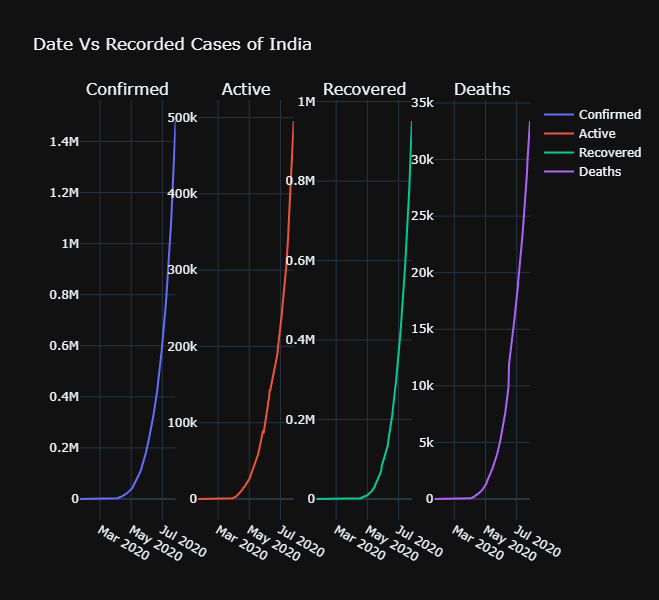

In [66]:
country_visualization(group_data,'India')